MSE del modelo: 34.95
Predicción del consumo: 30.99 m³


c:\Users\zarpi\.conda\envs\unifranz-lab\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


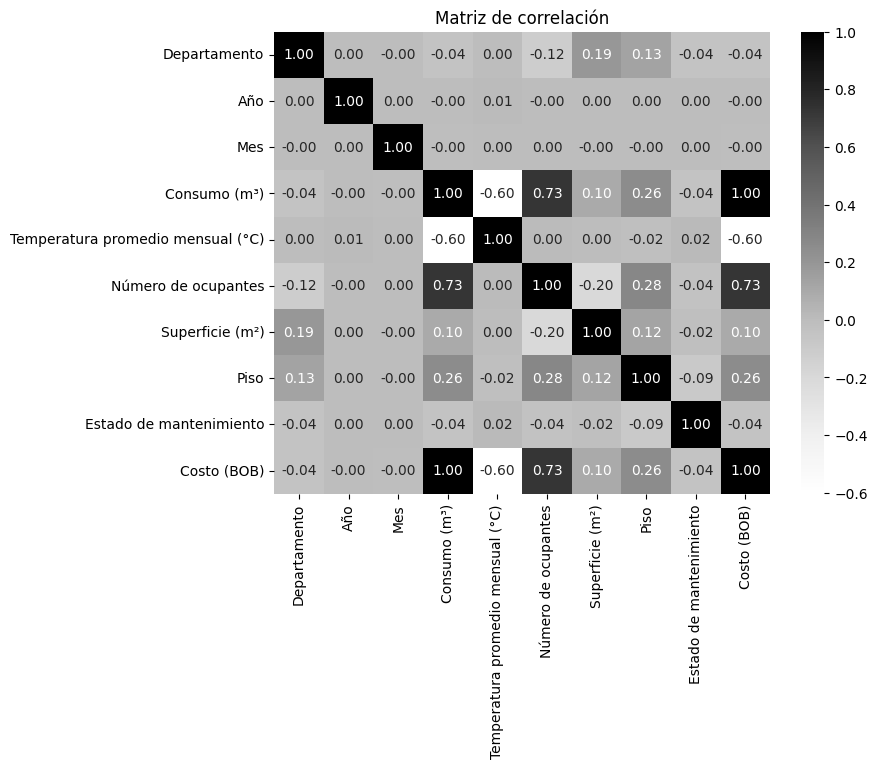

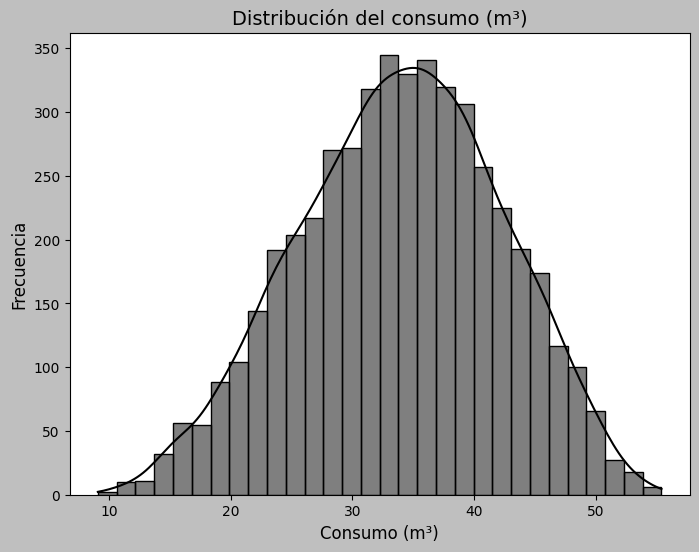

C:\Users\zarpi\AppData\Local\Temp\ipykernel_20652\1549760192.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Número de ocupantes', y='Consumo (m³)', data=df, ci=None, color='gray')


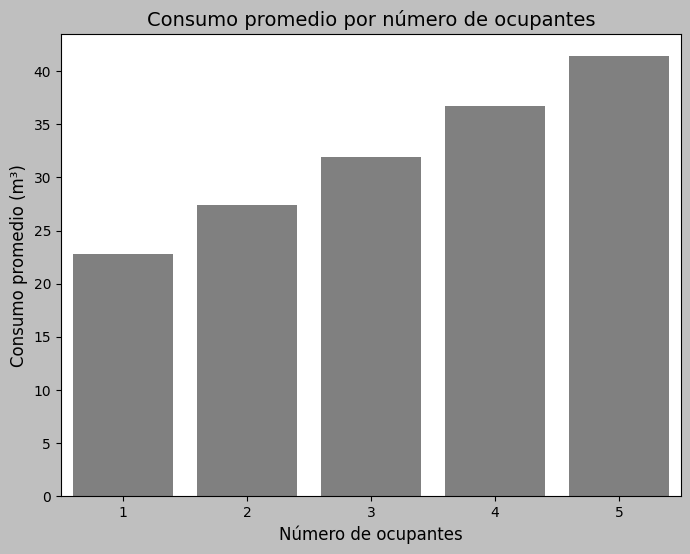

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar el dataset
file_path = './consumo_gas_departamentos_con_costo.csv'
df = pd.read_csv(file_path)

# Preprocesamiento: Codificar variables categóricas
df['Departamento'] = df['Departamento'].astype('category').cat.codes
df['Estado de mantenimiento'] = df['Estado de mantenimiento'].astype('category').cat.codes

# Definir las variables independientes (X) y dependiente (y)
X = df[['Departamento', 'Número de ocupantes', 'Mes']]
y = df['Consumo (m³)']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE del modelo: {mse:.2f}")

# Función para predecir el consumo de un departamento
def predecir_consumo(departamento, ocupantes, mes):
    departamento_cod = df[df['Departamento'] == departamento].iloc[0]['Departamento']
    pred = model.predict([[departamento_cod, ocupantes, mes]])
    return pred[0]



# Gráfico 1: Matriz de correlación en escala de grises
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greys')
plt.title('Matriz de correlación')
plt.show()

# Configurar estilo en escala de grises
plt.style.use('grayscale')

# Gráfico 2: Distribución del consumo en escala de grises
plt.figure(figsize=(8, 6))
sns.histplot(df['Consumo (m³)'], kde=True, bins=30, color='black')
plt.title('Distribución del consumo (m³)', fontsize=14)
plt.xlabel('Consumo (m³)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Gráfico 3: Consumo promedio por número de ocupantes en escala de grises
plt.figure(figsize=(8, 6))
sns.barplot(x='Número de ocupantes', y='Consumo (m³)', data=df, ci=None, color='gray')
plt.title('Consumo promedio por número de ocupantes', fontsize=14)
plt.xlabel('Número de ocupantes', fontsize=12)
plt.ylabel('Consumo promedio (m³)', fontsize=12)
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Cálculo de métricas
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} m³")
print(f"Mean Absolute Error (MAE): {mae:.2f} m³")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 34.95
Root Mean Squared Error (RMSE): 5.91 m³
Mean Absolute Error (MAE): 5.00 m³
R² Score: 0.51


In [13]:
# Ejemplo de predicción

tarifa_gas_bolivianos = 0.6  # Tarifa fija de gas en BOB por m³

# departamento, ocupantes, mes
consumo = predecir_consumo(0, 3, 5)

print(f"Predicción del consumo: {consumo:.2f} m³")

print(f"Tarifa en bolivianos: {round(consumo * tarifa_gas_bolivianos)} BOB")



Predicción del consumo: 30.99 m³
Tarifa en bolivianos: 19 BOB


c:\Users\zarpi\.conda\envs\unifranz-lab\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
